In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
df=df.drop('User ID',axis=1)
df.head()
# for analyze

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


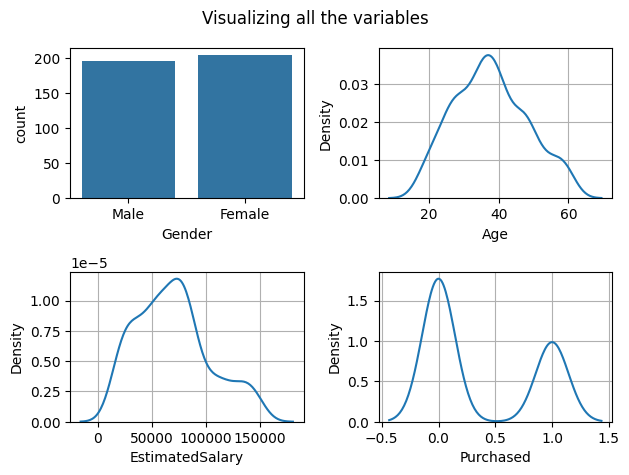

In [34]:
r=2
c=2
it=1
for i in df.columns:
    plt.suptitle("Visualizing all the variables")
    plt.subplot(r,c,it)
    if df[i].dtype=='object':
        sns.countplot(x=df[i])
    else:
        sns.kdeplot(df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [35]:
df[df['Purchased']==0].describe()

,Age,EstimatedSalary,Purchased
count,257.000000,257.000000,257.0
mean,32.793774,60544.747082,0.0
std,7.985844,24351.570102,0.0
min,18.000000,15000.000000,0.0
25%,26.000000,44000.000000,0.0
50%,34.000000,61000.000000,0.0
75%,38.000000,77000.000000,0.0
max,59.000000,141000.000000,0.0


In [36]:
df[df['Purchased']==1].describe()

,Age,EstimatedSalary,Purchased
count,143.000000,143.000000,143.0
mean,46.391608,86272.727273,1.0
std,8.612172,42064.200064,0.0
min,27.000000,20000.000000,1.0
25%,39.500000,41000.000000,1.0
50%,47.000000,90000.000000,1.0
75%,53.000000,122500.000000,1.0
max,60.000000,150000.000000,1.0


In [37]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


In [38]:
df['Gender_Male'] = df['Gender_Male'].replace({True:1,False:0})
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<Axes: >

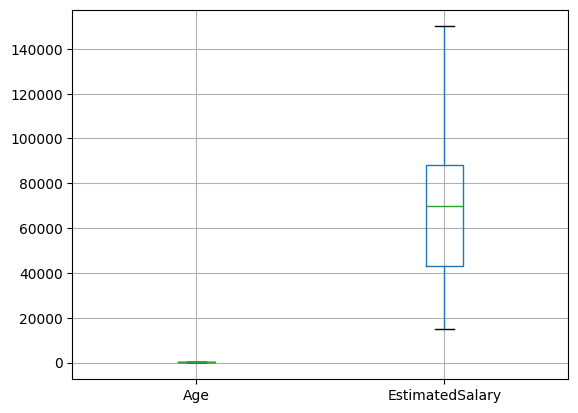

In [39]:
df[['Age','EstimatedSalary']].boxplot()

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mmax = MinMaxScaler()

In [43]:
df[['Age','EstimatedSalary']] = mmax.fit_transform(df[['Age','EstimatedSalary']])
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,0.023810,0.029630,0,1
1,0.404762,0.037037,0,1
2,0.190476,0.207407,0,0
3,0.214286,0.311111,0,0
4,0.023810,0.451852,0,1


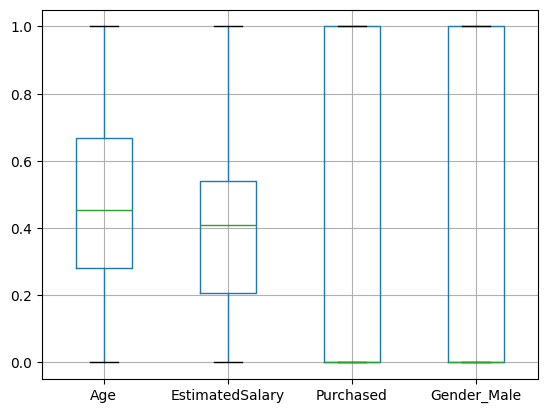

In [44]:
df.boxplot()
plt.show()

In [45]:
y = df['Purchased']
x = df.drop('Purchased',axis=1)

In [47]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 435.7 kB/s eta 0:00:22
     ---------------------------------------- 0.1/9.2 MB 651.6 kB/s eta 0:00:15
      --------------------------------------- 0.2/9.2 MB 952.6 kB/s eta 0:00:10
     - -------------------------------------- 0.3/9.2 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.4/9.2 MB 1.3 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/9.2 MB 2.0 MB/s eta 0:00:05
     ---- ----------------------------------- 1.0/9.2 MB 2.7 MB/s eta 0:00:04
     ------ --------------------------------- 1.5/9.2 MB 3.7 MB/s eta 0:00:03
     --------- ------------------------------ 2.1/9.2 MB 4.6 MB/s eta 0:00:02
     ----------- ---------------------------- 2.7/9.2 MB 5.4 MB/s eta 0:00:02
     -------------- ------------------------- 3.3/9.2 MB 6.0 MB/s eta 0:

In [48]:
import statsmodels.api as sm

In [49]:
xc = sm.add_constant(x)
model = sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.4711
Time:                        20:30:40   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9716      0.853     -9.340      0.000      -9.644      -6.299
Age           

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)

In [52]:
lr_model.coef_

array([[4.52863552, 2.57853733, 0.07935606]])

In [53]:
lr_model.intercept_

array([-4.06845791])

In [54]:
y_pred_train = lr_model.predict(xtrain)
y_pred_test = lr_model.predict(xtest)

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [56]:
accuracy_score(ytrain,y_pred_train),accuracy_score(ytest,y_pred_test)

(0.8107142857142857, 0.8416666666666667)

In [57]:
precision_score(ytrain,y_pred_train),precision_score(ytest,y_pred_test)

(0.8307692307692308, 0.9666666666666667)

In [58]:
recall_score(ytrain,y_pred_train),recall_score(ytest,y_pred_test)

(0.5625, 0.6170212765957447)

In [59]:
f1_score(ytrain,y_pred_train),f1_score(ytest,y_pred_test)

(0.670807453416149, 0.7532467532467533)